In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset from web

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)

In [ ]:
data.head(10)

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
5,+,MALEFG,\taggggcaaggaggatggaaagaggttgccgtataaagaaactag...
6,+,MALK,\t\tcagggggtggaggatttaagccatctcctgatgacgcatagt...
7,+,RECA,\t\ttttctacaaaacacttgatactgtatgagcatacagtataat...
8,+,RPOB,\t\tcgacttaatatactgcgacaggacgtccgttctgtgtaaatc...
9,+,RRNAB_P1,\tttttaaatttcctcttgtcaggccggaataactccctataatgc...


In [ ]:
data.dtypes

,0
Class,object
id,object
Sequence,object


In [ ]:
data.shape

(106, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     106 non-null    object
 1   id        106 non-null    object
 2   Sequence  106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


Data Preprocessing

In [ ]:
classes = data.loc[:, 'Class']
print(classes.value_counts())

Class
+    53
-    53
Name: count, dtype: int64


In [ ]:
seq = list(data.loc[:, 'Sequence'])
seq[-1]

'\t\ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaact'

In [ ]:
#removing \t from each sequence

dict = {}

for i, num in enumerate(seq):
  nucleotide = list(num)
  nucleotide = [char for char in nucleotide if char != '\t']
  nucleotide.append(classes[i])

  dict[i] = nucleotide
list(dict[0])



['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

In [ ]:
df = pd.DataFrame(dict)

In [ ]:
df.shape

(58, 106)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


In [ ]:
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [ ]:
#Renaming the column of target variable
df.rename(columns= {57:'Class'}, inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [ ]:
temp = df.copy(deep=True)
temp = temp.drop(['Class'], axis = 1)
temp.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,t,a,c,t,a,g,c,a,a,t,...,g,g,c,t,t,g,t,c,g,t
1,t,g,c,t,a,t,c,c,t,g,...,g,c,a,t,c,g,c,c,a,a
2,g,t,a,c,t,a,g,a,g,a,...,c,c,a,c,c,c,g,g,c,g
3,a,a,t,t,g,t,g,a,t,g,...,t,a,a,c,a,a,a,c,t,c
4,t,c,g,a,t,a,a,t,t,a,...,t,c,c,g,t,g,g,t,a,g


Encoding the Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(temp)

df1 = encoder.transform(temp).toarray()
del temp

In [ ]:
df_new = pd.DataFrame(df1)
print(df_new)

     0    1    2    3    4    5    6    7    8    9    ...  218  219  220  \
0    0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  0.0  1.0   
2    0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  1.0  0.0  0.0   
3    1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
101  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  1.0   
102  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  1.0  0.0   
103  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  1.0  0.0   
104  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  1.0   
105  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   

     221  222  223  224  225  226  227  
0    0.0  1.0  0.0  0.0  0.0  0.0 

In [ ]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
import pickle

# Save the OneHotEncoder object
with open('onehot_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [ ]:
import pickle

with open('encoder.pkl', 'wb') as file:
  pickle.dump(encoder, file)


In [ ]:
df['Class'] = df['Class'].replace(to_replace='+', value=1)
df['Class'] = df['Class'].replace(to_replace='-', value=0)

<ipython-input-21-71dd2ee06d8a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace(to_replace='-', value=0)


In [ ]:
df_new['Classes'] = df['Class']
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,Classes
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


Training and Testing the Clssification Algorithm

In [ ]:
X = df_new.drop(['Classes'], axis = 1).values
y = df_new['Classes'].values

seed = 1

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

Model Building

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

1.0


In [ ]:
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

0.9259259259259259


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



<Axes: >

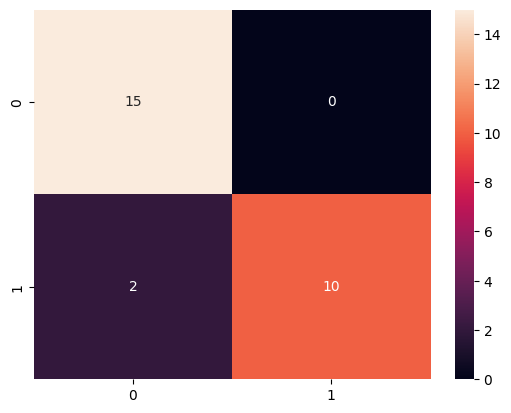

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

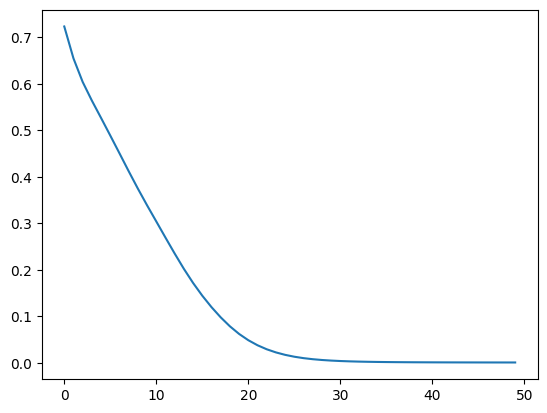

In [ ]:
loss_values = model.loss_curve_
plt.plot(loss_values)
plt.show()

In [ ]:
with open('Ecoli_detection.pkl', 'wb') as file:
  pickle.dump(model, file)